In [1]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#read data
sonar = pd.read_csv('sonar.csv')

In [3]:
#shape
sonar.shape

(208, 61)

In [4]:
#head of dataframe
sonar.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


last row 
1 for rocks 
0 for metals

In [5]:
#datatypes of columns
sonar.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
          ...   
V57      float64
V58      float64
V59      float64
V60      float64
Class      int64
Length: 61, dtype: object

In [6]:
#checking for null values
sonar.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V57      0
V58      0
V59      0
V60      0
Class    0
Length: 61, dtype: int64

In [7]:
#statistical summary of data
sonar.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
V1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
V2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
V3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
V4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
V5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
...,...,...,...,...,...,...,...,...
V57,208.0,0.007820,0.005785,0.0003,0.003700,0.00595,0.010425,0.0355
V58,208.0,0.007949,0.006470,0.0003,0.003600,0.00580,0.010350,0.0440
V59,208.0,0.007941,0.006181,0.0001,0.003675,0.00640,0.010325,0.0364
V60,208.0,0.006507,0.005031,0.0006,0.003100,0.00530,0.008525,0.0439


In [8]:
#skewness of data in columns
sonar.skew()

V1       2.131088
V2       2.155644
V3       2.652518
V4       3.401697
V5       2.018141
           ...   
V57      1.653090
V58      2.098330
V59      1.737506
V60      2.775754
Class    0.135903
Length: 61, dtype: float64

In [9]:
#class distribution
sonar.groupby('Class').size()

Class
0    111
1     97
dtype: int64

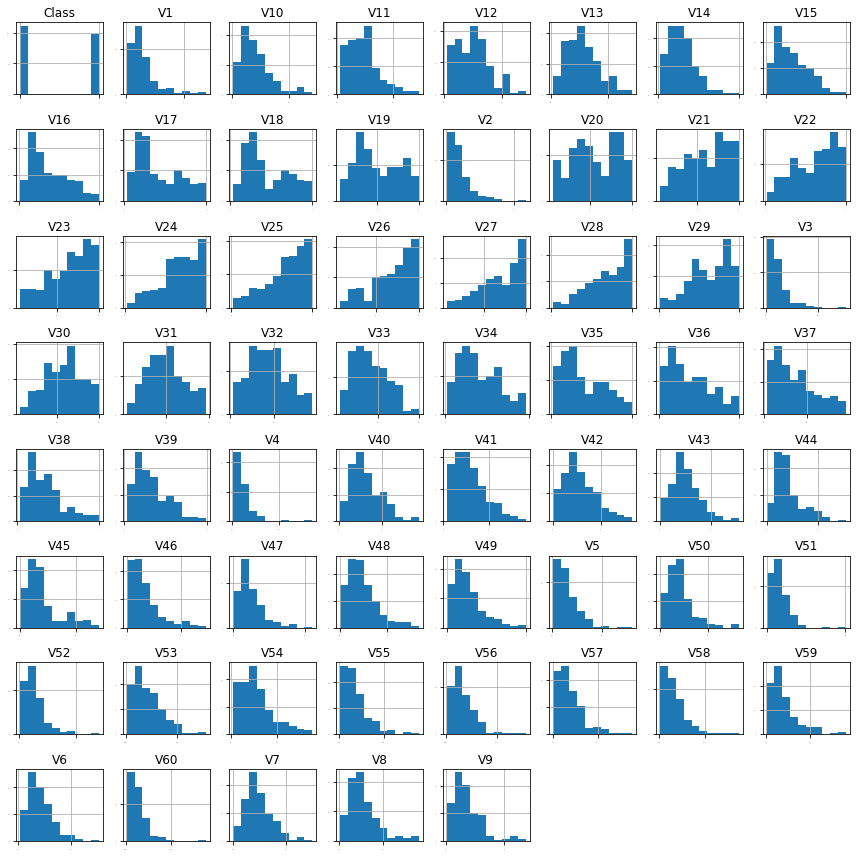

In [10]:
#HISTOGRAMS
sonar.hist(sharex=False ,sharey=False, xlabelsize=1,  ylabelsize=1, figsize=(12,12))
plt.tight_layout()

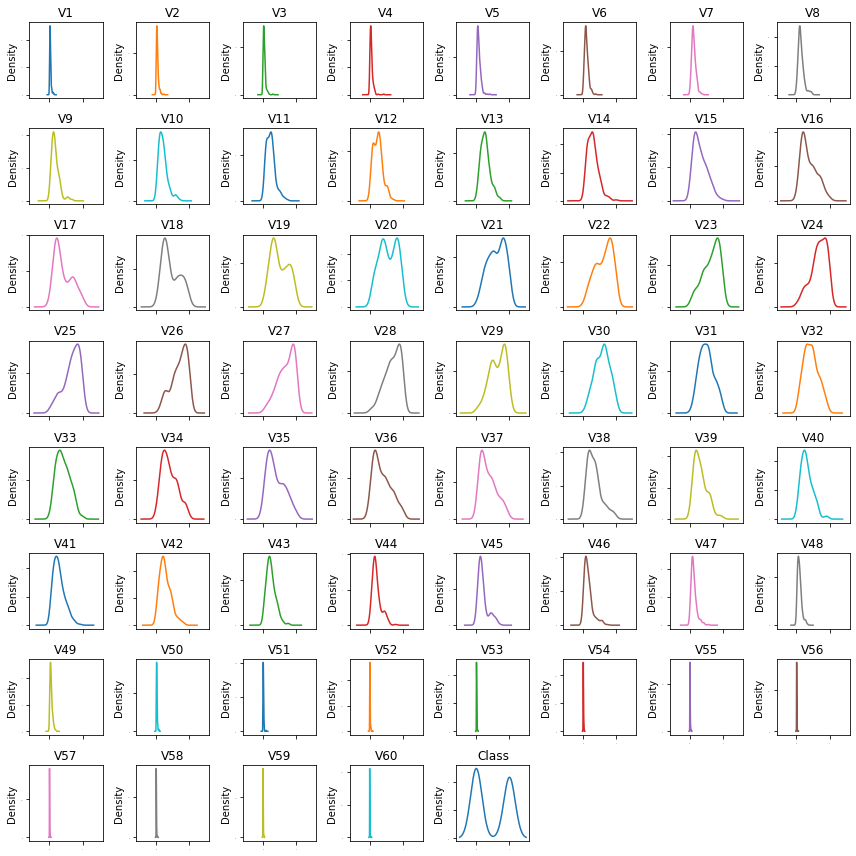

In [11]:
#density plots
l = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","V29","V30","V31","V32","V33","V34","V35","V36","V37","V38","V39","V40","V41","V42","V43","V44","V45","V46","V47","V48","V49","V50","V51","V52","V53","V54","V55","V56","V57","V58","V59","V60","Class"]
sonar.plot(kind='density', subplots=True, layout=(8,8), title=l, legend=False, fontsize=1, figsize=(12,12))
plt.tight_layout()

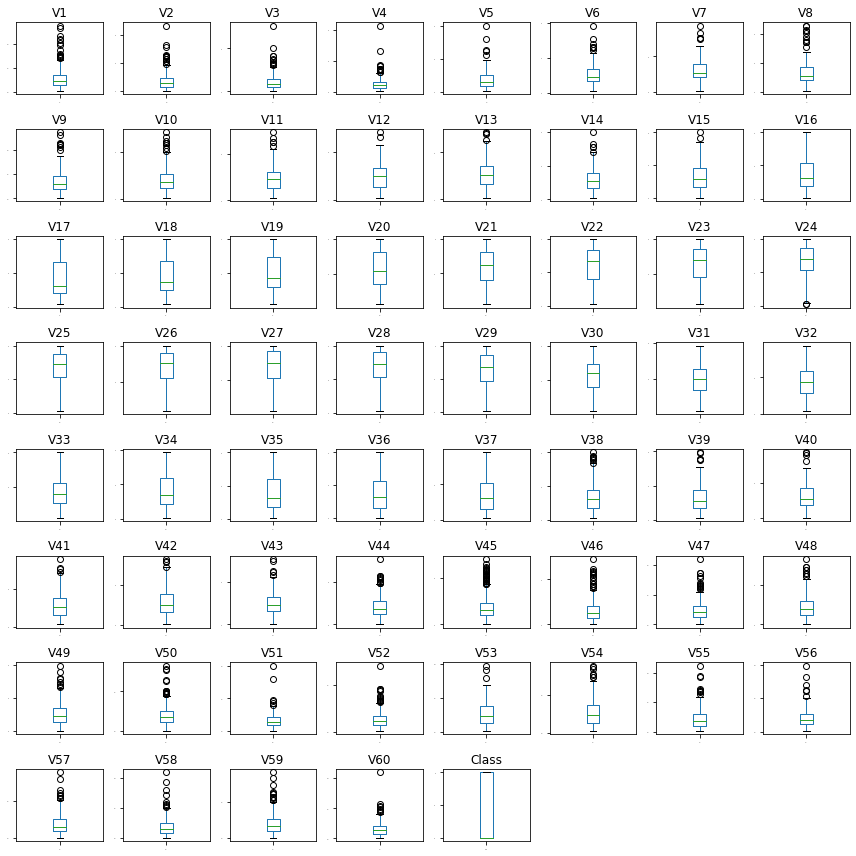

In [12]:
#boxplot
sonar.plot(kind='box', subplots=True, layout=(8,8), title=l, sharex=False, legend=False, fontsize=1, figsize=(12,12))
plt.tight_layout()

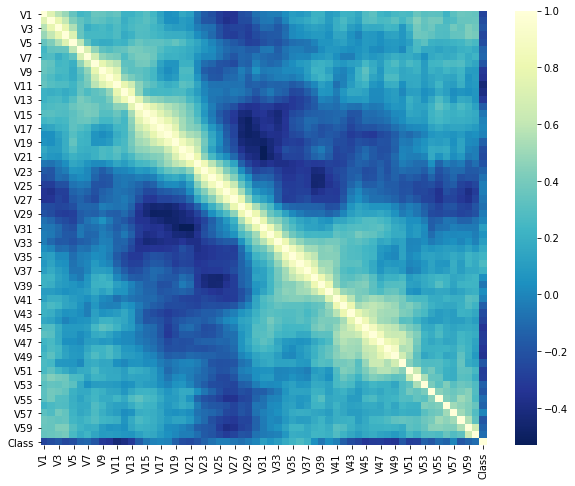

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(sonar.corr(), cmap='YlGnBu_r')

In [14]:
#importing machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
X = sonar.drop(['Class'], axis=1)
scaler = StandardScaler()
scaler.fit_transform(X)
son = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
son.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,...,0.595283,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,...,-0.297902,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,...,-1.065875,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,...,0.670411,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,...,-0.039129,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375


In [16]:
#assigning x and y
X = son.copy()
y = sonar['Class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lw = LogisticRegression()
lw.fit(X_train, y_train)
pred = lw.predict(X_test)
print(r2_score(y_test, pred))

0.017671517671517534


In [18]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        37
           1       0.69      0.77      0.73        26

    accuracy                           0.76        63
   macro avg       0.76      0.76      0.76        63
weighted avg       0.77      0.76      0.76        63



In [19]:
print(confusion_matrix(y_test, pred))

[[28  9]
 [ 6 20]]


In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), X, y, cv=5, scoring='r2').mean()

-0.46656126482213445

In [21]:
gbr = GradientBoostingClassifier()
param_grid = {'n_estimators':[10,100,500,1000], 'learning_rate':[0.001,0.01,0.1,1]}
grid = GridSearchCV(gbr, param_grid, cv=5, refit=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [22]:
grid_predictions = grid.predict(X_test)

In [23]:
print(confusion_matrix(y_test,grid_predictions))

[[28  9]
 [ 9 17]]


In [24]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        37
           1       0.65      0.65      0.65        26

    accuracy                           0.71        63
   macro avg       0.71      0.71      0.71        63
weighted avg       0.71      0.71      0.71        63



In [25]:
#saving model
from sklearn.externals import joblib
joblib.dump(lw, 'lw_sonar.pkl')

['lw_sonar.pkl']